#  Introduction
<hr>

It contains the details of customers from a store that can be used to perform customer segmentation using various clustering algorithms.

In [1]:
# importing Necessary Libraries for loading and viewing the dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime # to calculate the time took the cluster plot to complete

In [2]:
# Reading the file into the dataframe
mall_data = pd.read_csv('/home/swathireddy/Downloads/Mall_Customers.csv')
# mall_data = pd.read_csv("dataset_used/Mall_Customers.csv")
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
This dataset  contains 200 observations of customers for a shopping mall, the data has 5 features.<br>

In [3]:
# Checking the data
print(f"There are {mall_data.shape[0]} observations and {mall_data.shape[1]} features")

There are 200 observations and 5 features


In [4]:
# Turning the columns to lowercase and removing the spaces between words.
mall_data.columns = [i.lower().replace(" ", "_") for i in mall_data.columns]
mall_data.columns

Index(['customerid', 'gender', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

In [5]:
# Getting the statistical summary of the dataset
mall_data.describe()

,customerid,age,annual_income_(k$),spending_score_(1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Understanding the datatype and missing values
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              200 non-null    int64 
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   annual_income_(k$)      200 non-null    int64 
 4   spending_score_(1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Exploratory Data Analysis
<hr>

In [7]:
# Importing libraries to help with visualising the data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Plotting the distribution of the gender (Barchart)
plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Bar plot of gender with counts")
ax = sns.countplot(x="gender",
                   data=mall_data,
                   order=mall_data['gender'].value_counts().index,
                   alpha=0.5)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))

plt.xlabel(None)
plt.ylabel(None)
plt.box(False)

# --------------------------------------------------------------------------------------------------------------- #

# Plotting the percetage distribution of the gender (Piechart)
plt.subplot(1,2,2)
plt.title("Percentage of each gender Pie chart")
mall_data['gender'].value_counts().plot(kind='pie',
                                 legend=None,
                                 ylabel='',
                                 startangle=90,
                                 wedgeprops={'alpha':0.4,
                                             'edgecolor' : 'black',
                                             'linewidth': 0.5,
                                             'antialiased': True},
                                 autopct='%1.1f%%')

# plt.legend(mall_data.gender.value_counts().index, loc='upper left')
plt.axis('equal')
plt.show()

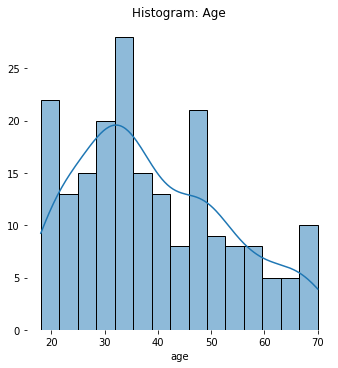

In [8]:
# Histogram: Age
sns.displot(mall_data['age'],
            bins=15,
            kde=True).set(title='Histogram: Age')
plt.box(False)
plt.ylabel(None)
plt.show()

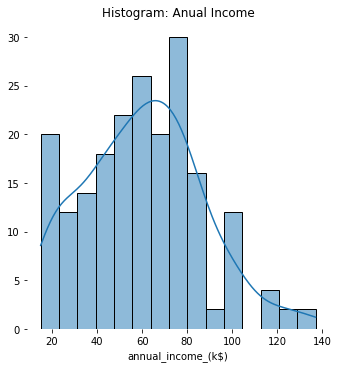

In [9]:
# Histogram: Anual Income
sns.displot(mall_data['annual_income_(k$)'],
            bins=15,
            kde=True).set(title='Histogram: Anual Income')
plt.box(False)
plt.ylabel(None)
plt.show()

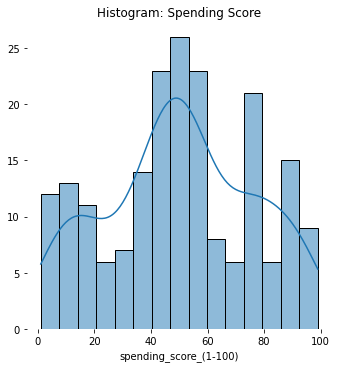

In [10]:
# Histogram: Spending Score
sns.displot(mall_data['spending_score_(1-100)'],
            bins=15,
            kde=True).set(title='Histogram: Spending Score')
plt.box(False)
plt.ylabel(None)
plt.show()

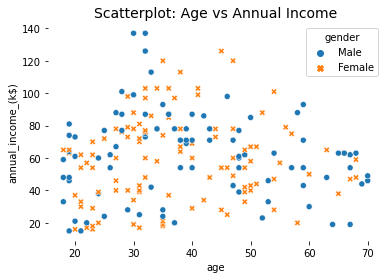

In [11]:
# Scatterplot: Age vs Annual Income
plt.title("Scatterplot: Age vs Annual Income", fontsize=14)
sns.scatterplot(data=mall_data,
                x='age',
                y='annual_income_(k$)',
                hue='gender',
                style='gender')

plt.box(None)
plt.show()

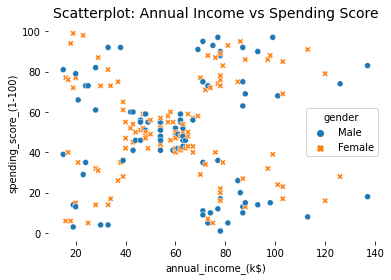

In [12]:
# Scatterplot: Annual Income vs Spending 
plt.title("Scatterplot: Annual Income vs Spending Score", fontsize=14)
sns.scatterplot(data=mall_data,
                x='annual_income_(k$)',
                y='spending_score_(1-100)',
                hue='gender',
                style='gender')

plt.box(None)
plt.show()

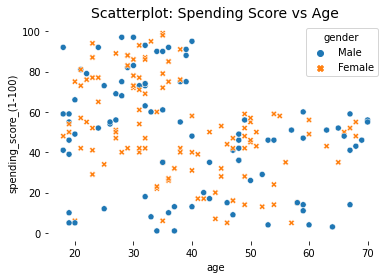

In [13]:
# Scatterplot: Spending Score vs Age
plt.title("Scatterplot: Spending Score vs Age", fontsize=14)
sns.scatterplot(data=mall_data,
                x='age',
                y='spending_score_(1-100)',
                hue='gender',
                style='gender')

plt.box(None)
plt.show()

After perorming the visualisation the following were beought out
- The dataset comprises more of females(56%) than males(44%)
- The age colunms has more of young adults hence making it skewed
- The annual income column is somewhat evenly distributed
- The spending_score column is evenly distributed
- Comparing the age and annual income column shows that there's is no relationship between them and also there is no visible cluster forming
- Comparing the annual income and the spending score column shows that there is a very visible cluser that can be formed from them
- Comparing the age and the spending score column shows that there is a not so visible cluster that could be formed

So for this we will be using two features to build a clustering algorithm we will be using the;
- Annual Income
- Spending score


# Scaling down the selected features
<hr>

In [14]:
# Importing the StandardScaler module
from sklearn.preprocessing import StandardScaler

In [15]:
# Extracting them from the dataframe
x = mall_data.iloc[:,[3, 4]].values

# Scaling down the features
scaler = StandardScaler()
x_kmeans =  scaler.fit_transform(x)

# Building the KMeans Clustering model
<hr>

In [40]:
# Importing the KMeans module
from sklearn.cluster import KMeans
wcss=[]

# Getting the clusters
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, n_init=1)
    kmeans.fit(x_kmeans)
    wcss.append(kmeans.inertia_)

In [43]:
!python3.7 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.7 MB/s eta 0:00:00m eta 0:00:010:01:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [46]:
# Installing the kneed module
!pip install --upgrade kneed



Defaulting to user installation because normal site-packages is not writeable


In [50]:
#numpy==1.18

#scipy==1.1.0

!pip install scikit-learn==0.21.3

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [53]:
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


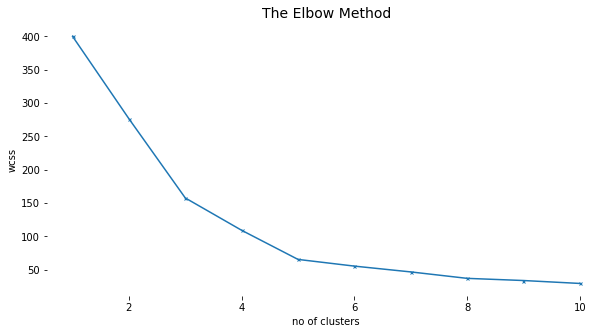

In [56]:
# Plotting the elbow chart
plt.subplots(figsize=(10,5))
plt.plot(range(1,11),
         wcss,
         marker='x',
         markersize='3')

plt.title('The Elbow Method', fontsize=14)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.box(None)
plt.show()

In [ ]:
# Importing Kneed to help get the elbow
#import kneed
from kneed import KneeLocator
# Implementing KneeLocator
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

In [59]:
# Building the cluster model
clusters = KMeans(n_clusters =5, init = 'k-means++', random_state = 42, n_init=1)
y_kmeans = clusters.fit_predict(x)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [60]:
# Adding the y_means to the new copied dataframe
df = mall_data.copy()
df['cluster'] = y_kmeans
df.head()

,customerid,gender,age,annual_income_(k$),spending_score_(1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


# Visualising the Clusters
<hr>
Using two techniques, we will be calculating the time it took to plot all the clusters and centriods
- Manually calling each cluster to plot as well as the centroid
- Using the seaborn (sns) scatter plot to plot using the cluster in the new dataframe (df) as a hue

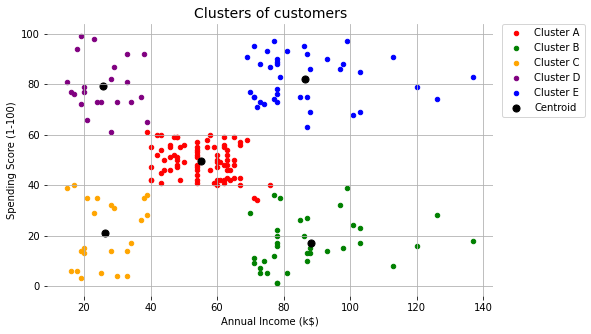

In [61]:
first_start = datetime.now()
# Plotting the clusters
plt.figure(figsize=(8,5))

# Plotting each of the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster A')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'green', label = 'Cluster B')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'orange', label = 'Cluster C')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 20, c = 'purple', label = 'Cluster D')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 20, c = 'blue', label = 'Cluster E')

# Plotting the centriod
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroid')

# Others
plt.title('Clusters of customers', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(False)
plt.show()
first_stop = datetime.now()

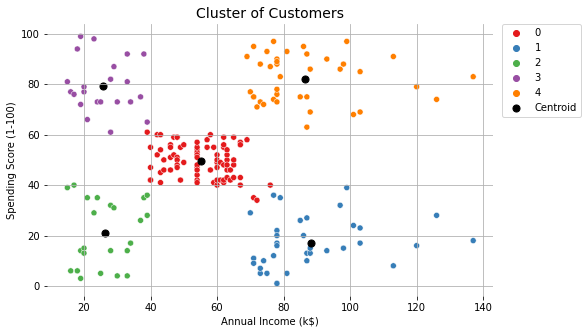

In [62]:
second_start = datetime.now()
# Using seaborn to plot the clusters
plt.figure(figsize=(8,5))
plt.title('Cluster of Customers', fontsize=14)
sns.scatterplot(data=df,
                x='annual_income_(k$)',
                y='spending_score_(1-100)',
                hue='cluster',
                palette="Set1")

# Plotting the centriod
plt.scatter(clusters.cluster_centers_[:, 0],
            clusters.cluster_centers_[:, 1],
            s = 50,
            c = 'black',
            label = 'Centroid')

# Others
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.grid(True)
plt.box(None)
plt.show()
second_stop = datetime.now() 

In [63]:
first_cluster_plot = first_stop - first_start
second_cluster_plot = second_stop - second_start

print(f"The first manual plot took {first_cluster_plot} seconds to complete\n"
f"The seocnd seaborn plot took {second_cluster_plot} seconds to complete")

The first manual plot took 0:00:00.862802 seconds to complete
The seocnd seaborn plot took 0:00:00.623776 seconds to complete


<b>The purpose of using 2 different plotting method was to see if there was going to be a difference in the plots generated but based on what we can see above there was no difference in the plots.</b><br>The only difference was the time of execution the first plot was faster than the second plot

# Grouping the new dataframe based on the cluster
<hr>

In [64]:
# Call the dataframe .head() to see the first 5 data
df = df.drop('customerid', axis=1)
df.head()

,gender,age,annual_income_(k$),spending_score_(1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


In [65]:
# Selecting numeric columns for the groupby function
df.select_dtypes(include=[np.number]).groupby('cluster').mean()

,age,annual_income_(k$),spending_score_(1-100)
cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


# Conclusions
<hr>

The dataset used had 200 observations and 5 features, the dataset was somewhat clean and simple.

<!-- <b></b> -->
<ol>
    <li>Performing an EDA showed me insights into the data for example;</li>
    <ul>
        <li>We have more ladies than men this automatically shows that the data is skewed to the ladies based on the gender column
        <li>It also shows a level of skewness in the age column because most of the customers ages ranges between 20 - 40 years old
        <li>The anual income also showed a level of skewness because it shows that most customers make between 20,000 - 70,000 annually
        <li>The spending score is evenlly distributed and is not skewed to a particular side.
        <li>During comparison using the scatter plot it shows that the Spending score and the annual income columns actually shows a very visible cluster so that's why I picked both columns.
    </ul>
    <li> After the EDA I scalled down the features for better results
    <li> Installed the kneed module to help pick our elbow
    <li> Used the elbow to determine the numbers of clusters
    <li> Built the model
    <li> Visualized the model
    <ul>
        <li> When visualizing the clusters I decided to try out two seperate techniques;
            <ul>
                <li> Manually plotting each clusters using plt.subplots() and
                <li> ploting them using the seaborn module and the clusters as the hue
                    <b><p>Looking at the plots it is very visible that there was no difference in the plots but we if we calculate the time it took to run both plots we could see that the manual plots was faster than the seaborn plots even with bare milliseconds.</p></b>
            </ul>
        </ul>
    <li> After grouping the dataframe based on the clusters we can see that we have different categories of people
        <ul>
            <li> Cluster 0 shows we have people in their forties earning well to live comfortably with an average of 55,290 annually.
            <li> Cluster 1 shows we have people in their forties earning very okay can be considered well off or rich with an average income of 88,200 yearly.
            <li> Cluster 2 shows we have people in their forties earning way below average with their average at 26,300 annually.
            <li> Cluster 3 shows people in their twenties earning below average can be considered not rich but not poor either with an annual average of 25,700.
            <li> Cluster 4 shows people in their thirties earning comfortably with an average of 86,500 annually.
        </ul>
</ol>



